# **Prévision de consommation d'éléctricité**

**Jeux de données 1 : la consommation ,la production et les échanges d’électricité :**

Ce jeu de données semble représenter la consommation ,la production et les échanges d’électricité sur un territoire (probablement un pays ou une région) avec un détail mensuel.

Voici une description détaillée des colonnes :

*   Mois – Le mois correspondant à l’enregistrement (probablement au format texte, ex. "Janvier 2023").
*   Qualité – Niveau de qualité ou statut des données (par exemple « définitif », « provisoire »).


* Territoire – Zone géographique concernée (national, régional, etc.)
*   Production totale – Quantité totale d’électricité produite (MWh ou GWh).


*   Production nucléaire – Production d’électricité d’origine nucléaire
*   Production thermique totale – Production totale d’origine thermique (charbon + fioul + gaz).


*   Production thermique charbon – Part de la production thermique provenant du charbon
*   Production thermique fioul – Part de la production thermique provenant du fioul.

*   Production thermique gaz – Part de la production thermique provenant du gaz.
*   Production hydraulique – Production d’électricité issue des barrages et autres sources hydrauliques.

*   Production éolien – Production d’électricité issue des parcs éoliens.

*   Production solaire – Production d’électricité issue du solaire photovoltaïque.
*   Production bioénergies – Production issue de la biomasse, biogaz, etc.


*  Consommation totale – Consommation totale d’électricité du territoire.

*   Solde exportateur – Différence entre exportations et importations (positif si exportateur net).

*   Échanges export – Quantité totale exportée (très peu de valeurs disponibles).
*  Échanges import – Quantité totale importée.


*   Échanges avec le Royaume-Uni, Espagne, Italie, Suisse, Allemagne et Belgique – Détail des échanges transfrontaliers avec chaque pays.


**Jeux de données 2 : Consommation DJU chauffage**

cette contient des donner de consomation de DJU chauffage mensuelle

**Le DJU (Degré-Jour Unifié) de chauffage** est un indicateur utilisé pour mesurer les besoins en chauffage d’un bâtiment ou d’un territoire sur une période donnée (jour, mois, année).

Le principe :


*   On choisit une température de référence (souvent 18 °C en France pour le chauffage).
*   Chaque jour, on calcule l’écart entre cette température de référence et la température moyenne extérieure.

Exemple simple :

*  Température moyenne du jour = 10 °C

*  Température de référence = 18 °C

*  DJU du jour = 18 − 10 = 8

Les DJU d’un mois sont donc la somme de ces écarts journaliers, ce qui donne une mesure de la rigueur climatique du mois.

source

https://cegibat.grdf.fr/simulateur/calcul-dju




Les étapes :

1.   chargement de jeux de données
2.   Nettoyage et Traitemment de données
1.   visualisation








In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# chargement de data de consommation d'énergie

data_consomation=pd.read_csv("consommation.csv",sep=";")
data_consomation.head(15)

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique,Unnamed: 22
0,0000-00,Données consolidées,Grand-Est,11346,8643.0,1120,22.0,2,1095,565,...,4545,6711.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000-00,Données consolidées,Nouvelle-Aquitaine,5289,4179.0,164,NaN,0,164,419,...,4578,711.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000-00,Données consolidées,Auvergne-Rhône-Alpes,11622,8382.0,334,6.0,11,316,2630,...,6834,4483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000-00,Données consolidées,Bourgogne-Franche-Comté,467,NaN,124,NaN,0,123,89,...,2188,-1724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000-00,Données consolidées,Bretagne,535,NaN,182,NaN,4,178,59,...,2443,-1915.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000-00,Données consolidées,Centre-Val de Loire,7434,6951.0,87,NaN,0,87,17,...,2031,5402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000-00,Données consolidées,France,54572,37352.0,5470,157.0,149,5163,6350,...,49559,4252.0,7740.0,3488.0,759.0,964.0,1918.0,1553.0,-943.0,NaN
7,0000-00,Données consolidées,Ile-de-France,393,NaN,259,0.0,6,252,3,...,7539,-7145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000-00,Données consolidées,Occitanie,3689,1812.0,68,NaN,0,68,1296,...,4097,-527.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000-00,Données consolidées,Normandie,4898,4276.0,343,41.0,27,274,13,...,2946,1951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_consomation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Mois                                      1143 non-null   object 
 1   Qualité                                   1143 non-null   object 
 2   Territoire                                1143 non-null   object 
 3   Production totale                         1143 non-null   int64  
 4   Production nucléaire                      708 non-null    float64
 5   Production thermique totale               1143 non-null   int64  
 6   Production thermique charbon              769 non-null    float64
 7   Production thermique fioul                1143 non-null   int64  
 8   Production thermique gaz                  1143 non-null   int64  
 9   Production hydraulique                    1143 non-null   int64  
 10  Production éolien                   

# **Traitemment de jeux donnée**

In [ ]:
data_consomation_copy=data_consomation.copy()
data_consomation_copy = data_consomation_copy.drop(data_consomation_copy.index[:13]) # supprimer les 13 prémier lignes
data_consomation_copy=data_consomation_copy.drop(columns=["Unnamed: 22"]) # supprimer la colonne Unnamed: 22
data_consomation_copy.reset_index(drop=True, inplace=True) #commencer l'index à 0
data_consomation_copy.head()

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


Commentaire:

Puis que pour les données des échange sont seul 99 par rapport à 1130 donc je doit diviser le data_set en deux partie
partie contient les donner de consomation , production d'énergie et partie contient les données de échange

In [ ]:
data_echanges=data_consomation_copy[["Mois","Echanges export" ,"Echanges import" ,"Echanges avec le Royaume-Uni" , "Echanges avec l'Espagne"
, "Echanges avec l'Italie" , "Echanges avec la Suisse" , "Echanges avec l'Allemagne et la Belgique","Territoire"
]]


In [ ]:
data_echanges.isna().sum()

,0
Mois,0
Echanges export,1032
Echanges import,1032
Echanges avec le Royaume-Uni,1032
Echanges avec l'Espagne,1032
Echanges avec l'Italie,1032
Echanges avec la Suisse,1032
Echanges avec l'Allemagne et la Belgique,1032
Territoire,0


In [ ]:
data_echanges_clean=data_echanges.dropna(inplace=True)  # nettoyage de cette partie de data

/tmp/ipython-input-1481510837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_echanges_clean=data_echanges.dropna(inplace=True)  # nettoyage de cette partie de data


In [ ]:
#data_echanges_clean.head()

In [ ]:
data_consomation_div=data_consomation_copy[['Mois', 'Qualité', 'Territoire', 'Production totale',
       'Production nucléaire', 'Production thermique totale',
       'Production thermique charbon', 'Production thermique fioul',
       'Production thermique gaz', 'Production hydraulique',
       'Production éolien', 'Production solaire', 'Production bioénergies',
       'Consommation totale', 'Solde exportateur']]

In [ ]:
data_consomation_div.isna().sum()

,0
Mois,0
Qualité,0
Territoire,0
Production totale,0
Production nucléaire,430
Production thermique totale,0
Production thermique charbon,369
Production thermique fioul,0
Production thermique gaz,0
Production hydraulique,0


In [ ]:
data_consomation_clean=data_consomation_div.dropna()

# **Analyse de la Consommation Totale:**

•	Comment la consommation évolue-t-elle dans le temps ?

•	Y a-t-il des hausses ou baisses inhabituelles ?

•	Existe-t-il une saisonnalité (consommation plus forte l’hiver ?) ?

•	Y a-t-il des pics de consommation ? À quelles périodes ?

In [ ]:
# convertir le mois en data time
data_consomation_clean["Mois"]=pd.to_datetime(data_consomation_clean["Mois"], format="%Y-%m", errors='coerce')

/tmp/ipython-input-56036328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_consomation_clean["Mois"]=pd.to_datetime(data_consomation_clean["Mois"], format="%Y-%m", errors='coerce')


In [ ]:
data_consomation_clean.columns

Index(['Mois', 'Qualité', 'Territoire', 'Production totale',
       'Production nucléaire', 'Production thermique totale',
       'Production thermique charbon', 'Production thermique fioul',
       'Production thermique gaz', 'Production hydraulique',
       'Production éolien', 'Production solaire', 'Production bioénergies',
       'Consommation totale', 'Solde exportateur'],
      dtype='object')

In [ ]:
df_consomation=data_consomation_clean.drop(columns=['Qualité','Solde exportateur'])
df_consomation.set_index('Mois', inplace=True)
df_consomation_fr=df_consomation[df_consomation["Territoire"]=="France"]

In [ ]:
df_consomation_fr

,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale
Mois,,,,,,,,,,,,
2012-01-01,France,57177,42811.0,5399,741.0,691,3967,6741,1587,125,514,51086
2012-02-01,France,54419,38661.0,8721,2511.0,1309,4901,5244,1123,216,454,54476
2012-03-01,France,48583,37549.0,5276,1435.0,666,3175,3894,977,356,531,43156
2012-04-01,France,44192,33100.0,3484,1655.0,486,1343,5302,1572,329,405,40176
2012-05-01,France,40433,29058.0,1772,854.0,368,549,7706,974,454,469,35257
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01,France,41255,29162.0,3298,40.0,170,3087,3808,3420,779,786,36482
2019-11-01,France,46161,29133.0,5768,473.0,190,5104,6501,3406,518,832,44180
2019-12-01,France,51350,32985.0,4481,252.0,188,4039,7870,4694,446,871,47096


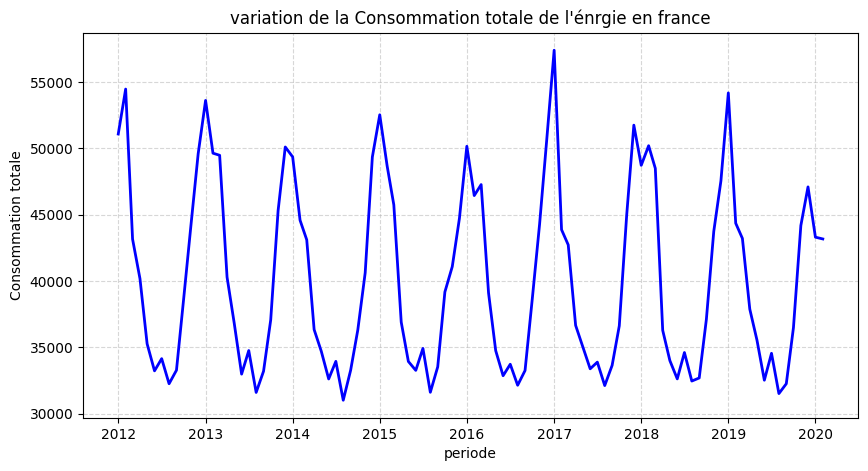

In [ ]:

# visualisation de la variation de consomation d'énergie en france
conso_france=data_consomation_clean[['Mois','Territoire','Consommation totale']]
conso_france=conso_france[conso_france['Territoire']=="France"]

# visualisation
plt.figure(figsize=(10,5))
plt.plot(conso_france["Mois"]
        ,conso_france["Consommation totale"] ,

        color='blue',
        linewidth=2,
        label="Consommation totale")
plt.title("variation de la Consommation totale de l'énrgie en france")
plt.xlabel('periode')
plt.ylabel('Consommation totale')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

commentaire : ce graphique montre que la variation de la consomation de l'enrgie est saisonniére

en 2017 : indique une forte consomation de l'énergie

# **Analyse des types de production d’électricité**

•	Quelle est la part de chaque source d’énergie (nucléaire, thermique, hydraulique…) ?

•	Comment la production nucléaire évolue-t-elle dans le temps ?

•	Est-ce que l’usage du charbon ou du gaz diminue ?

•	Quelle est la place des énergies renouvelables (hydraulique) ?

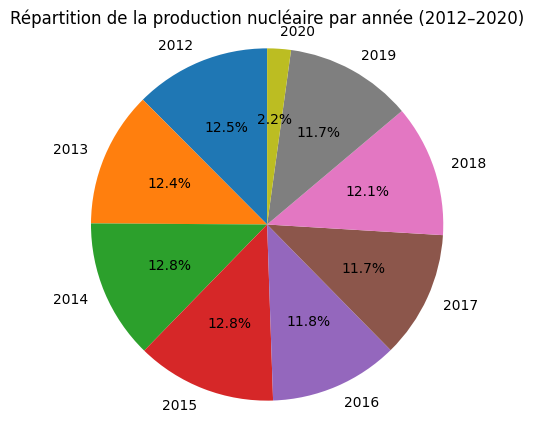

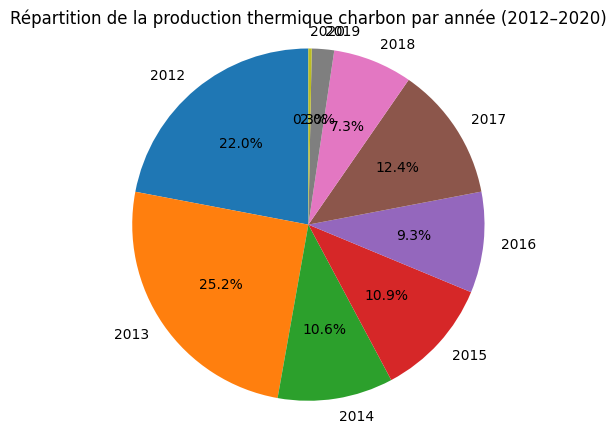

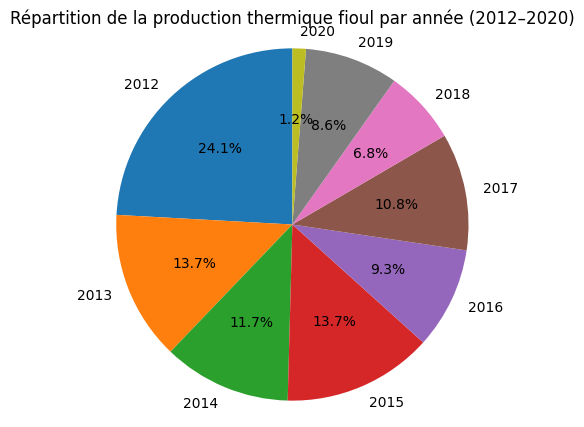

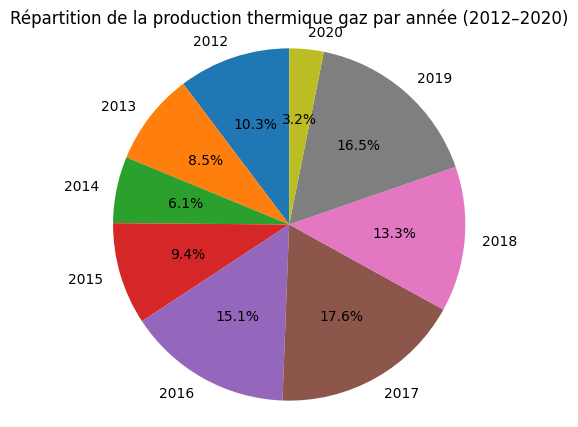

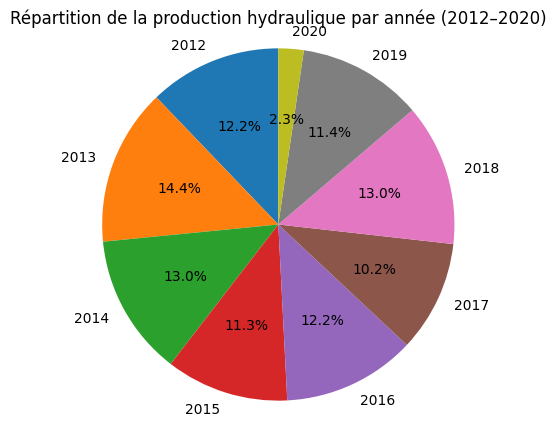

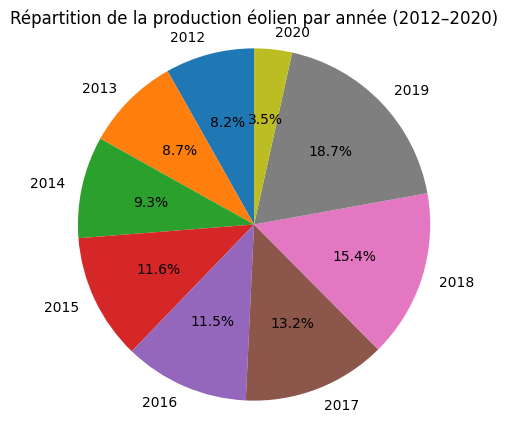

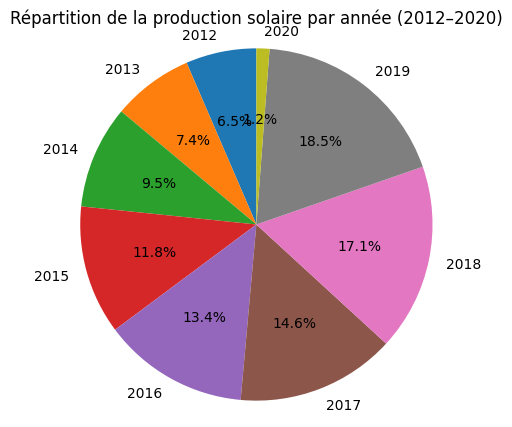

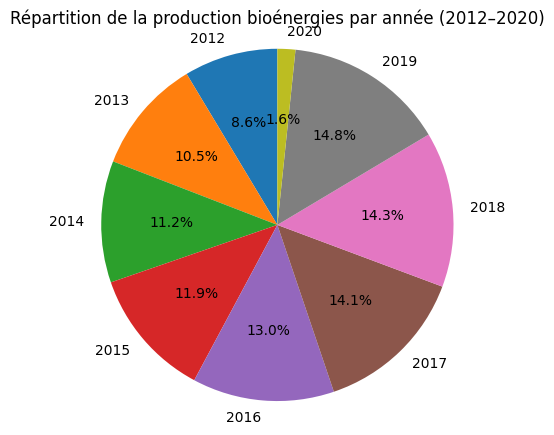

In [ ]:
# Question 1
#Calcule de la part (%) de chaque source par rapport à la production totale :
product_energie =data_consomation_clean[['Territoire','Production nucléaire', 'Production thermique totale',
       'Production thermique charbon', 'Production thermique fioul',
       'Production thermique gaz', 'Production hydraulique',
       'Production éolien', 'Production solaire', 'Production bioénergies']]
product_energie=product_energie[product_energie['Territoire']=="France"]
product_energie=product_energie.drop(columns=['Territoire'])
for par_energie in product_energie.columns:
  product_energie[par_energie]=(product_energie[par_energie]/product_energie[par_energie].sum())*100


product_energie["Mois"] = pd.to_datetime(data_consomation_clean["Mois"])
product_energie["Année"] = data_consomation_clean["Mois"].dt.year       # creation de colonne "année"

colonnes_energie = [
'Production nucléaire',
       'Production thermique charbon', 'Production thermique fioul',
       'Production thermique gaz', 'Production hydraulique',
       'Production éolien', 'Production solaire', 'Production bioénergies'
]

# Boucle sur chaque énergie
for energie in colonnes_energie:
    # Calcul de la somme annuelle
    prod_annuelle = product_energie.groupby("Année")[energie].sum()

    # Filtrer entre 2012 et 2020
    prod_annuelle = prod_annuelle.loc[2012:2020] # je peut supprimer "evidente"

    # Affichage camembert
    plt.figure(figsize=(5,5))
    plt.pie(
        prod_annuelle,
        labels=prod_annuelle.index,
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f"Répartition de la {energie.lower()} par année (2012–2020)")
    plt.axis('equal')
    plt.show()

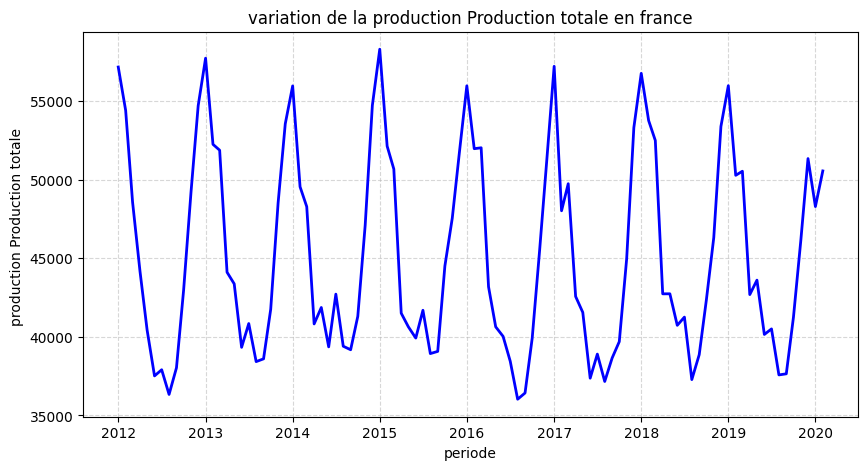

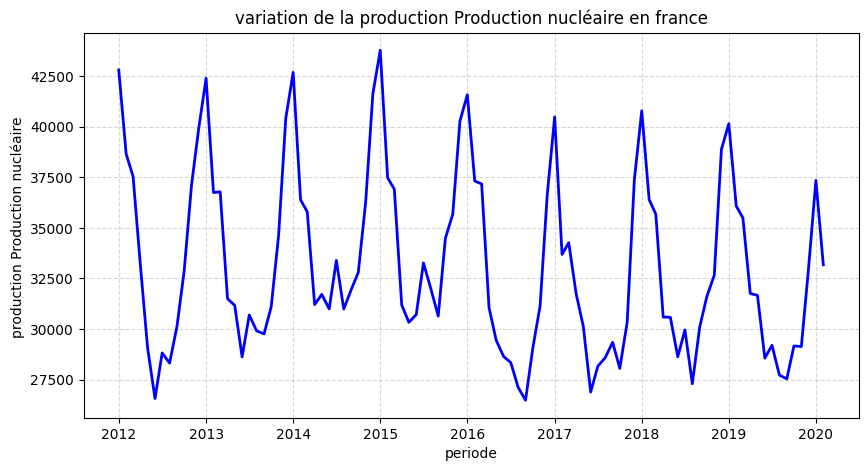

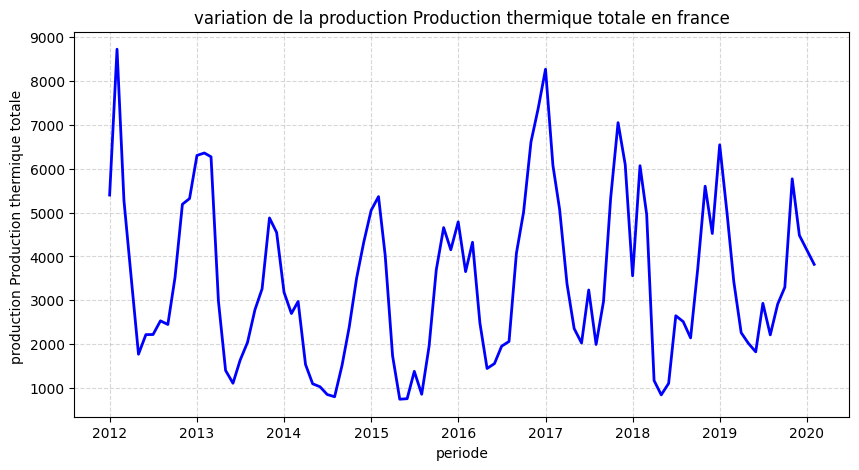

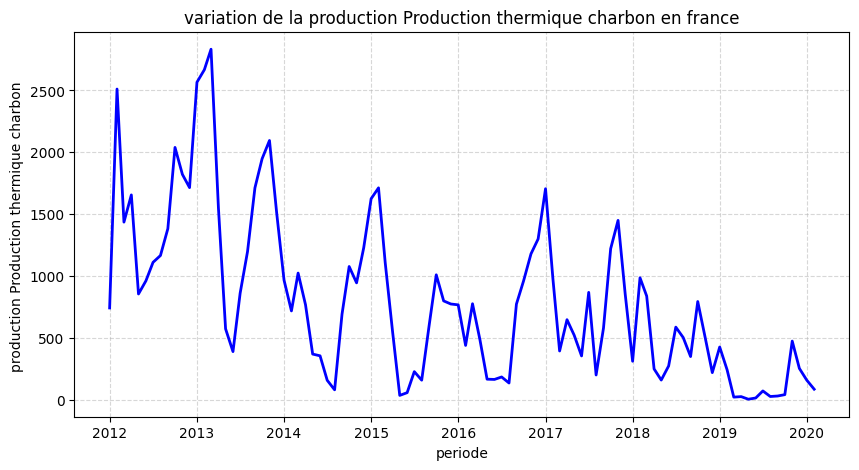

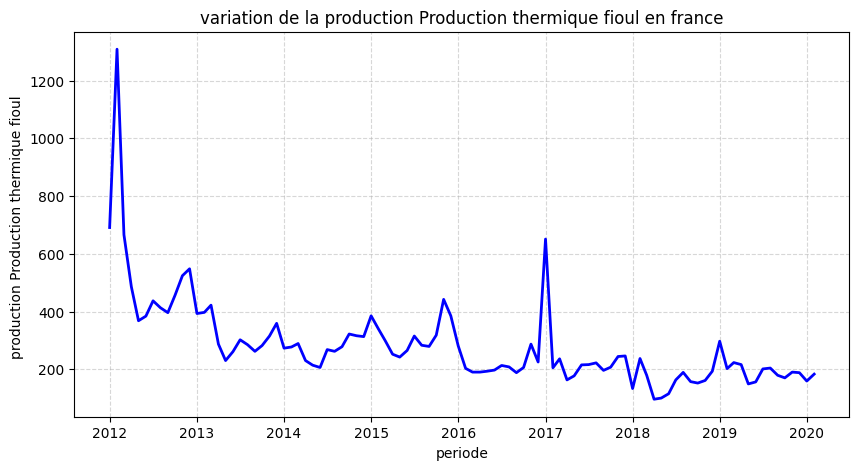

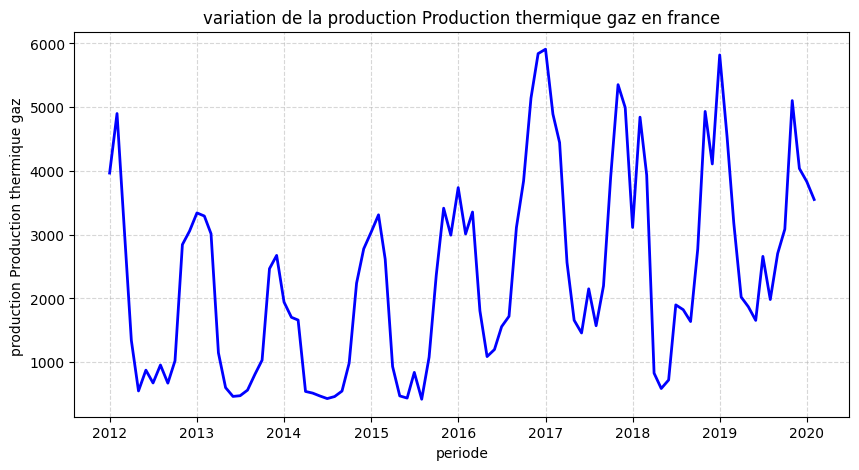

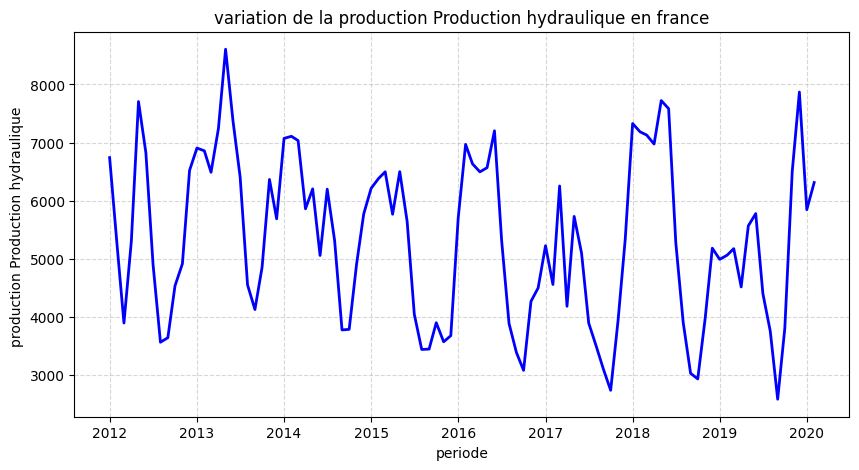

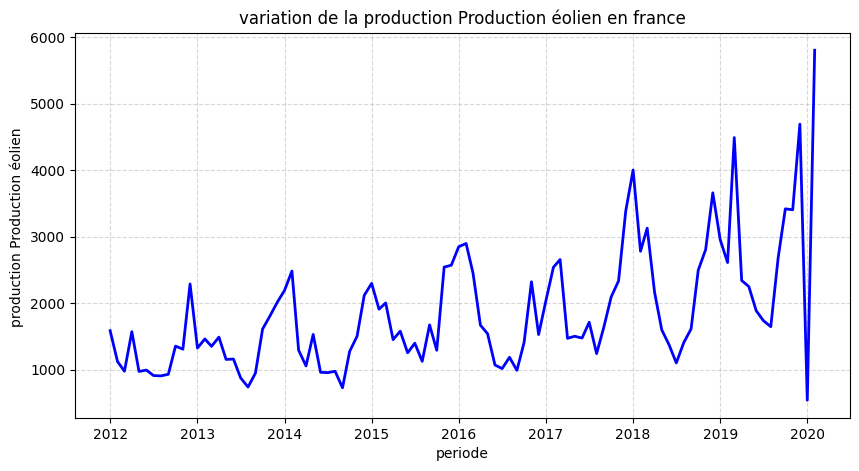

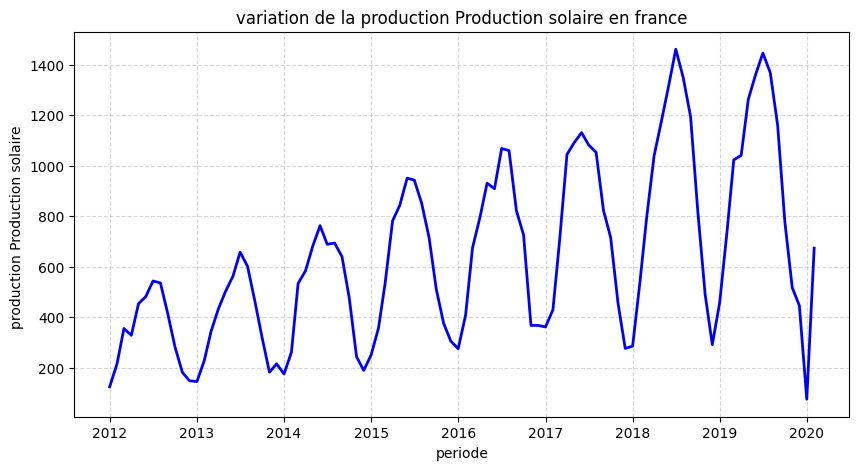

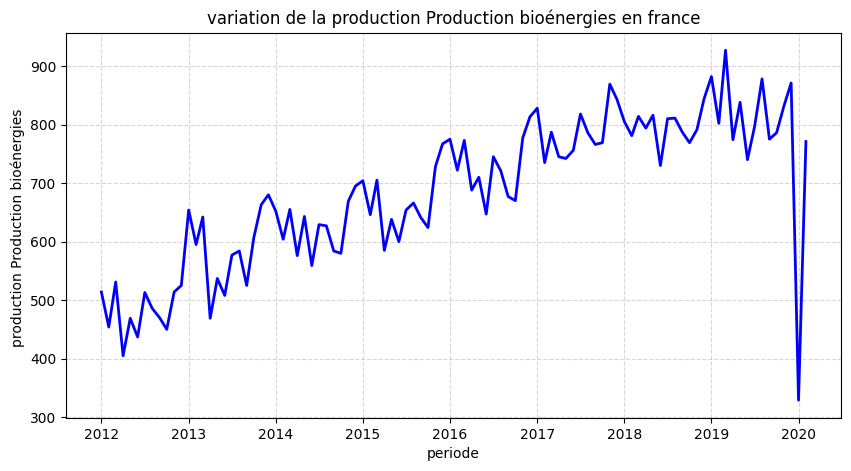

In [ ]:
# Guestion 2
product_df=data_consomation_clean[['Mois','Territoire', 'Production totale',
       'Production nucléaire', 'Production thermique totale',
       'Production thermique charbon', 'Production thermique fioul',
       'Production thermique gaz', 'Production hydraulique',
       'Production éolien', 'Production solaire', 'Production bioénergies']]

product_df_france=product_df[product_df['Territoire']=="France"]
#product_df

product=product_df_france.drop(columns=['Territoire','Mois'])
for col in product.columns:
  # visualisation
  plt.figure(figsize=(10,5))
  plt.plot(product_df_france["Mois"]
        ,product[col] ,

        color='blue',
        linewidth=2,
        label="production")
  plt.title(f"variation de la production {col} en france")
  plt.xlabel('periode')
  plt.ylabel(f'production {col} ')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.show()

In [ ]:
#Quesuion 3
data_consomation_clean["Mois"] = pd.to_datetime(data_consomation_clean["Mois"])
data_consomation_clean["Année"] = data_consomation_clean["Mois"].dt.year

/tmp/ipython-input-103367397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_consomation_clean["Mois"] = pd.to_datetime(data_consomation_clean["Mois"])
/tmp/ipython-input-103367397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_consomation_clean["Année"] = data_consomation_clean["Mois"].dt.year


In [ ]:
data_consomation_clean.head(2)

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur,Année
0,2012-01-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,1587,125,514,51086,5371.0,2012
1,2012-02-01,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,1123,216,454,54476,-715.0,2012


In [ ]:
data_consomation_clean['Production renouvelable']=product_energie['Production hydraulique'] + product_energie['Production éolien'] + product_energie['Production solaire'] + product_energie['Production bioénergies']
data_consomation_clean.head(2)

/tmp/ipython-input-3679510120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_consomation_clean['Production renouvelable']=product_energie['Production hydraulique'] + product_energie['Production éolien'] + product_energie['Production solaire'] + product_energie['Production bioénergies']


,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur,Année,Production renouvelable
0,2012-01-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,1587,125,514,51086,5371.0,2012,3.120910
1,2012-02-01,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,1123,216,454,54476,-715.0,2012,2.636798


In [ ]:
production_renouvable_par_année=data_consomation_clean.groupby("Année")[["Production renouvelable" ,
                                                              "Production nucléaire" ,
                                                              "Production thermique totale"]].sum()
production_renouvable_par_année

,Production renouvelable,Production nucléaire,Production thermique totale
Année,,,
2012,35.433042,404882.0,48101
2013,41.058849,570946.0,56725
2014,42.946553,696341.0,40091
2015,46.528371,695134.0,53025
2016,50.076572,630190.0,71667
2017,52.117021,620383.0,84586
2018,59.814996,648893.0,61495
2019,63.395153,622998.0,67997
2020,8.629443,115612.0,12615


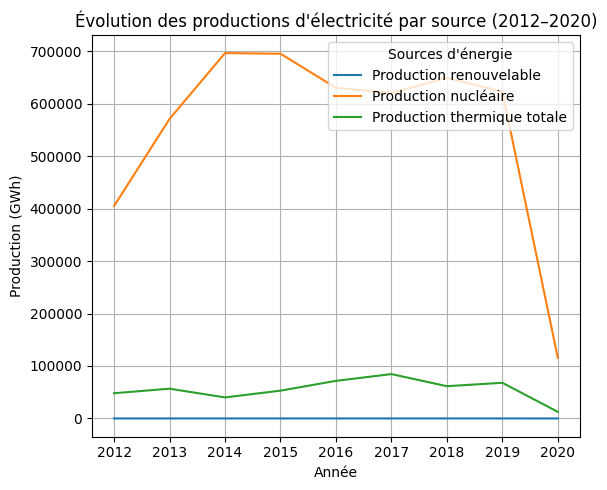

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))

# Tracer avec pandas et passer l'axe
production_renouvable_par_année.plot(ax=ax)

# Ajouter la légende + titre + labels
ax.set_title("Évolution des productions d'électricité par source (2012–2020)")
ax.set_xlabel("Année")
ax.set_ylabel("Production (GWh)")
ax.grid(True)
ax.legend(title="Sources d'énergie", loc="upper right")

plt.tight_layout()
plt.show()

# **Relations entre production et consommation**

• Est-ce que la consommation est toujours proche de la production totale ?

• Y a-t-il des écarts fréquents, qui seraient compensés par des importations ?

• Quelle source de production augmente quand la demande augmente ?



<Axes: xlabel='Mois'>

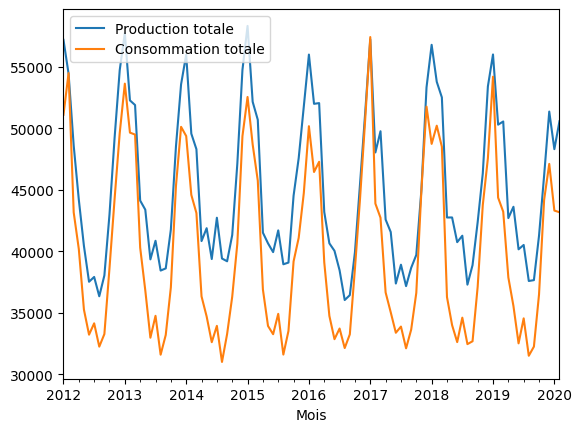

In [ ]:
df_consomation_fr[["Production totale","Consommation totale"]].plot()

In [ ]:
comparaisopn_pro_com=data_consomation_clean[['Année','Territoire','Production totale','Consommation totale']]
comparaisopn_pro_com=comparaisopn_pro_com[comparaisopn_pro_com['Territoire']=="France"]
comparaisopn_pro_com=comparaisopn_pro_com.drop(columns=['Territoire'])
comparaisopn_pro_com=comparaisopn_pro_com.groupby("Année")[["Production totale","Consommation totale"]].sum()

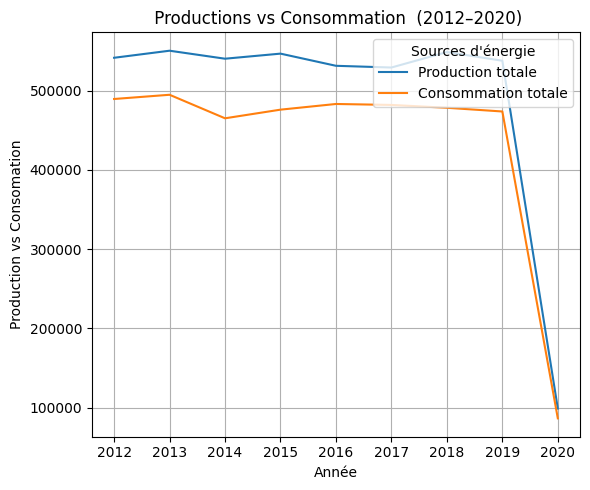

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))

# Tracer avec pandas et passer l'axe
comparaisopn_pro_com.plot(ax=ax)

# Ajouter la légende + titre + labels
ax.set_title(" Productions vs Consommation  (2012–2020)")
ax.set_xlabel("Année")
ax.set_ylabel("Production vs Consomation")
ax.grid(True)
ax.legend(title="Sources d'énergie", loc="upper right")

plt.tight_layout()
plt.show()

# **Analyse des importations et exportations**

• La France est-elle généralement exportatrice ou importatrice nette ?

• Avec quels pays les échanges sont les plus importants ?

• Y a-t-il des périodes où la France dépend fortement des importations ?

• Peut-on détecter des chocs ou événements géopolitiques dans les échanges ?

In [ ]:
data_echanges["Mois"]=pd.to_datetime(data_echanges["Mois"])
data_echanges["Année"]=data_echanges["Mois"].dt.year


/tmp/ipython-input-3860491429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_echanges["Mois"]=pd.to_datetime(data_echanges["Mois"])
/tmp/ipython-input-3860491429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_echanges["Année"]=data_echanges["Mois"].dt.year


In [ ]:
data_echanges.head(2)

,Mois,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique,Territoire,Année
0,2012-01-01,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0,France,2012
1,2012-02-01,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0,France,2012


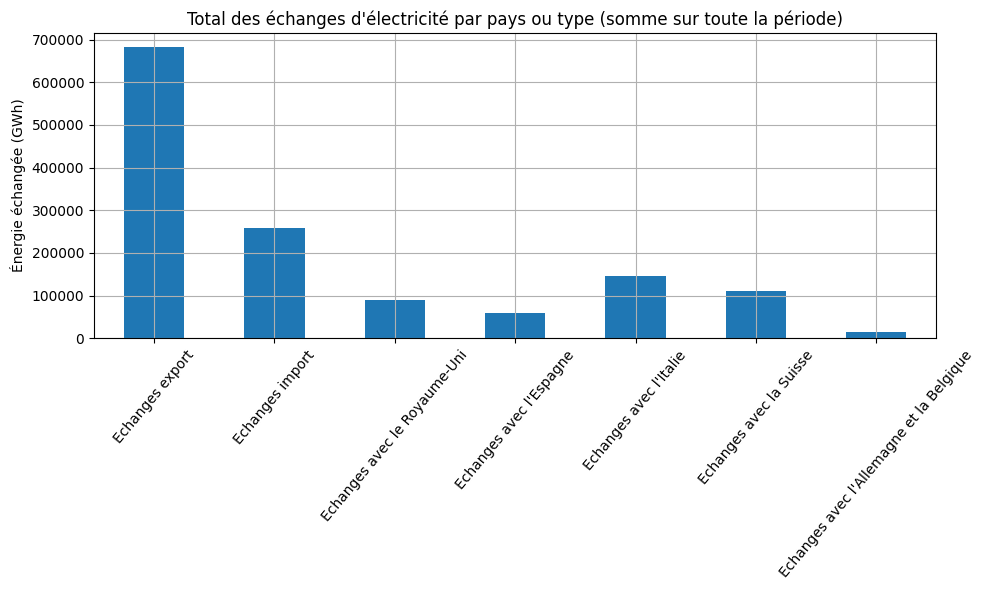

In [ ]:
data_echanges_année=data_echanges[["Echanges export",	"Echanges import",	"Echanges avec le Royaume-Uni",	"Echanges avec l'Espagne",	"Echanges avec l'Italie"	,"Echanges avec la Suisse",	"Echanges avec l'Allemagne et la Belgique"]]

echanges_totaux = data_echanges_année.sum()



plt.figure(figsize=(10,6))
echanges_totaux.plot(kind="bar")
plt.title("Total des échanges d'électricité par pays ou type (somme sur toute la période)")
plt.ylabel("Énergie échangée (GWh)")
plt.xticks(rotation=50)
plt.grid(True)
plt.tight_layout()
plt.show()


# A**nalyse par mois ou saison**

•	Comparer la consommation par mois : y a-t-il un cycle annuel régulier ?

•	Existe-t-il une saisonnalité forte ?

•	Quelle saison consomme le plus d’électricité ?

•	Est-ce que la production thermique est plus utilisée en hiver ?

/tmp/ipython-input-3646930413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_consomation_clean["Nom_mois"] = data_consomation_clean["Mois"].dt.month_name()  # Get month name


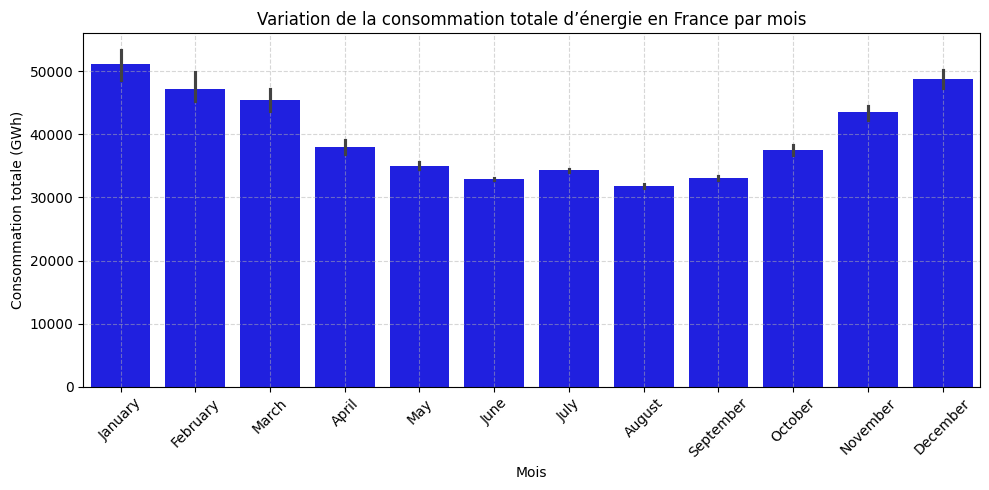

In [ ]:

data_consomation_clean["Nom_mois"] = data_consomation_clean["Mois"].dt.month_name()  # Get month name
# visualisation de la variation de consomation d'énergie en france
conso_france_mois=data_consomation_clean[['Nom_mois','Territoire','Consommation totale']]
conso_france_mois=conso_france_mois[conso_france_mois['Territoire']=="France"]

# visualisation
plt.figure(figsize=(10,5))
sns.barplot(data=conso_france_mois, x="Nom_mois", y="Consommation totale", color='blue')
plt.title("Variation de la consommation totale d’énergie en France par mois")
plt.xlabel("Mois")
plt.ylabel("Consommation totale (GWh)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analyse de data du DJU chauffage

In [269]:
#chargement de data du DJU chauffage

data_dju = pd.read_excel('dju.xlsx', header=None, skiprows=11)
data_dju.head(11)

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,Total
1,2019.0,404.9,268.3,233.1,168.5,117.9,14,0,0,0,0,0,0,1206.6
2,2018.0,303.4,432.6,314.3,119.7,55.9,8.1,0,3.3,34.3,122.4,282.5,325.9,2002.2
3,2017.0,467.9,278.4,206.1,182.6,75,9.4,1,6.8,62.6,99.4,282.6,369,2040.6
4,2016.0,364.4,321.6,321.1,212.1,88.1,27.5,5.7,3.2,11.7,176,285.6,390.8,2207.3
5,2015.0,392,365.7,275.5,141.1,91.5,15.8,6.9,6.1,71.9,176.9,195,248.1,1986.2
6,2014.0,324.4,281.9,223.9,135.5,100.2,19.1,8.3,19.3,16,92.3,222.6,368.2,1811.5
7,2013.0,429.2,402.2,376.6,209.5,158.4,43.6,0.6,5,41.5,105,303.9,349.5,2424.8
8,2012.0,336,435.9,201.9,230.3,83.3,35,12.4,2.4,58,154.6,296.2,345.9,2191.5
9,2011.0,392,304.8,243.1,77.6,43.4,31.4,15,11.9,23.2,127.6,226.6,312.7,1809


In [270]:
data_dju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       11 non-null     float64
 1   1       12 non-null     object 
 2   2       12 non-null     object 
 3   3       12 non-null     object 
 4   4       12 non-null     object 
 5   5       12 non-null     object 
 6   6       12 non-null     object 
 7   7       12 non-null     object 
 8   8       12 non-null     object 
 9   9       12 non-null     object 
 10  10      12 non-null     object 
 11  11      12 non-null     object 
 12  12      12 non-null     object 
 13  13      12 non-null     object 
dtypes: float64(1), object(13)
memory usage: 1.4+ KB


In [271]:
#Suppression des deux premières lignes et dernière Series
data_dju.drop([0, 1], axis=0, inplace=True)
data_dju.drop([13], axis=1, inplace=True)

In [273]:
data_dju.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
2,2018.0,303.4,432.6,314.3,119.7,55.9,8.1,0,3.3,34.3,122.4,282.5,325.9
3,2017.0,467.9,278.4,206.1,182.6,75,9.4,1,6.8,62.6,99.4,282.6,369
4,2016.0,364.4,321.6,321.1,212.1,88.1,27.5,5.7,3.2,11.7,176,285.6,390.8
5,2015.0,392,365.7,275.5,141.1,91.5,15.8,6.9,6.1,71.9,176.9,195,248.1
6,2014.0,324.4,281.9,223.9,135.5,100.2,19.1,8.3,19.3,16,92.3,222.6,368.2


In [274]:
data_dju[0]=data_dju[0].astype(int)

data_dju.set_index([0], inplace=True)

In [275]:
#Transformation des données
dju_chauffage = {'Mois':[],'dju_chauffage':[]}

for year in data_dju.index.values:
    for month in data_dju.columns:
        dju_chauffage['Mois'].append(f"{year}-{month}")
        dju_chauffage['dju_chauffage'].append(data_dju.loc[year,month])

dju = pd.DataFrame(dju_chauffage)
dju['Mois'] = pd.to_datetime(dju['Mois'])

#Indexation des données selon les mois d'enregistrement
dju.set_index('Mois', inplace=True)

#Aperçu des données mensuelles du chauffage électrique (dataframe "dju")
display(dju.head())
display(dju.shape)

,dju_chauffage
Mois,
2018-01-01,303.4
2018-02-01,432.6
2018-03-01,314.3
2018-04-01,119.7
2018-05-01,55.9


(120, 1)

In [276]:
# Triez l'index par ordre chronologique
dju_sorted = dju.sort_index()

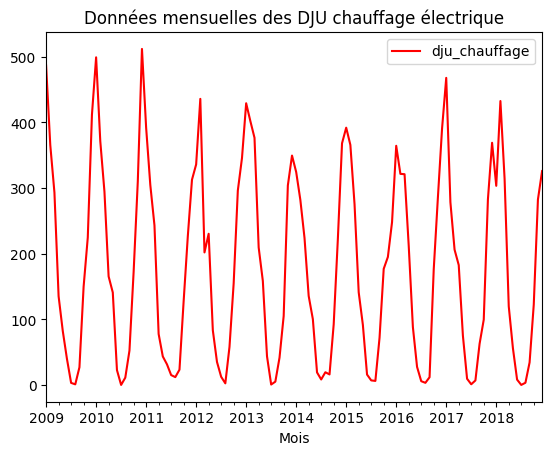

In [277]:
#Visualisation des données mensuelles des Degrés Jour Unifiés (DJU) chauffage électrique
dju_sorted.plot(color='r')
plt.title("Données mensuelles des DJU chauffage électrique")
plt.show()

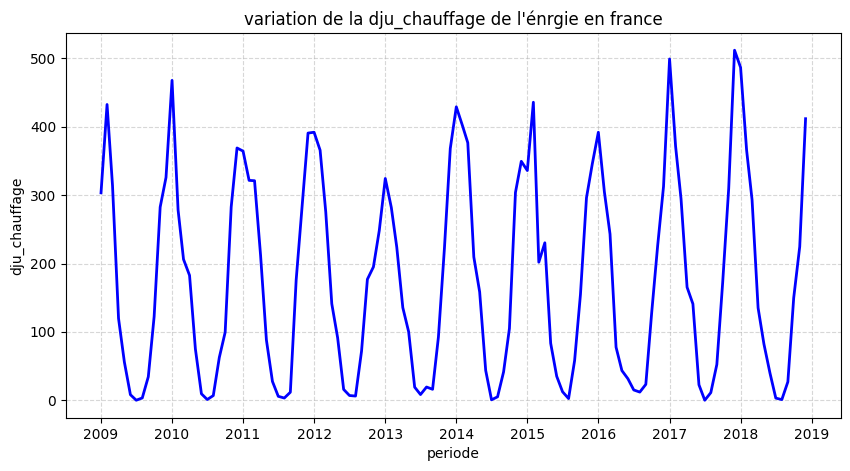

In [278]:
# visualisation
plt.figure(figsize=(10,5))
plt.plot(dju_sorted.index
        ,dju["dju_chauffage"] ,

        color='blue',
        linewidth=2,
        label="dju_chauffage")
plt.title("variation de la dju_chauffage de l'énrgie en france")
plt.xlabel('periode')
plt.ylabel('dju_chauffage')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [280]:

conso_france=df_consomation_fr["Consommation totale"]
#conso_france

In [282]:
#Création d'un échantillon de travail par jointure des deux précédents dataframe

df = pd.merge(conso_france, dju, how='inner', on='Mois')
df

,Consommation totale,dju_chauffage
Mois,,
2012-01-01,51086,336.0
2012-02-01,54476,435.9
2012-03-01,43156,201.9
2012-04-01,40176,230.3
2012-05-01,35257,83.3
...,...,...
2018-08-01,32451,3.3
2018-09-01,32683,34.3
2018-10-01,37102,122.4


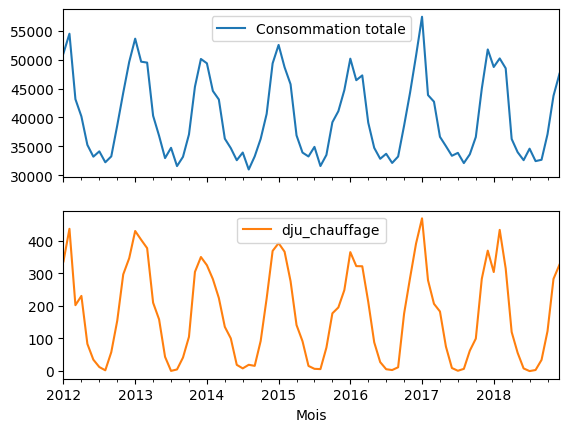

In [283]:
df.plot(subplots=True)
plt.show()